Nama  : WIlliam Yulio

NIM   : 2301869840

Kelas : LD01

### Import Library

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report 

### Load Dataset

In [ ]:
dataset = pd.read_csv('titanic.txt')

data = dataset[['PassengerId', 'Pclass', 'Age', 'SibSp' ,'Parch', 'Survived']] 
data

# Dalam tahapan ini saya melakukan load dataset dengan menggunakan library pandas untuk membaca file text yang ada
# Selanjutnya saya membuat variabel yang akan menampung kolom yang diminta pada soal 1.a , dimana variabel ini akan saya gunakan untuk proses data cleaning dan EDA

,PassengerId,Pclass,Age,SibSp,Parch,Survived
0,1,3,22.0,1,0,0
1,2,1,38.0,1,0,1
2,3,3,26.0,0,0,1
3,4,1,35.0,1,0,1
4,5,3,35.0,0,0,0
...,...,...,...,...,...,...
886,887,2,27.0,0,0,0
887,888,1,19.0,0,0,1
888,889,3,NaN,1,2,0
889,890,1,26.0,0,0,1


### Data Cleaning

In [ ]:
data.isnull().sum()
# Pertama-tama saya kan mengecek apakah terdapat data didalam datset yang memiliki value null
# dan ternyata ditemukan variabel yang memiliki value null yaitu age dengan jumlah 177 data, maka tahap selanjutnya adalah kita akan melihat value null ini akan diisi dengan angka apa (filling missing value)

PassengerId      0
Pclass           0
Age            177
SibSp            0
Parch            0
Survived         0
dtype: int64

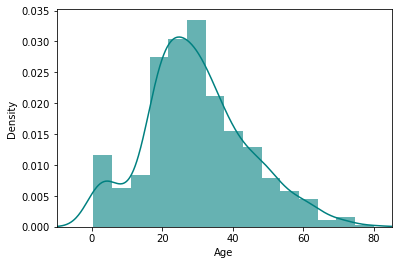

In [ ]:
ax = data["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
data["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

# Selanjutnya saya akan melakukan ploting untuk melihat berabagai variasi umur didalamnya, dan dapat dilihat bahwa total umur 30 cukup banyak
# Dari sini dapat kita simpulkan bahwa nilai mean yang akan didapat dikisaran 20-30 an

In [ ]:
data['Age'] = data['Age'].fillna(round(data['Age'].mean()))

# Selanjutnya saya akan memasukkan data-data null yang sebelumnya sudah kita cari dengan nilai mean dari data age
# Kemudian dalam mengisi missing value, saya menggunakan round() agar bisa mendapatkan hasil yang bulat, karena variabel umur merupakan variabael discrete

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data
# Selanjutnya saya memanggil data, untuk melihat apakah proses filling missing value sudah berjalan atau belum

,PassengerId,Pclass,Age,SibSp,Parch,Survived
0,1,3,22.0,1,0,0
1,2,1,38.0,1,0,1
2,3,3,26.0,0,0,1
3,4,1,35.0,1,0,1
4,5,3,35.0,0,0,0
...,...,...,...,...,...,...
886,887,2,27.0,0,0,0
887,888,1,19.0,0,0,1
888,889,3,30.0,1,2,0
889,890,1,26.0,0,0,1


In [ ]:
data.isnull().sum()
# Kemudian dalam tahap selanjutnya saya akan mencoba melihat apakah masih ada variabel yang memiliki missing value, dan ternyata sudah tidak ada variabel yang memiliki missing value

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Survived       0
dtype: int64

### Visual Exploratory Data Analysis

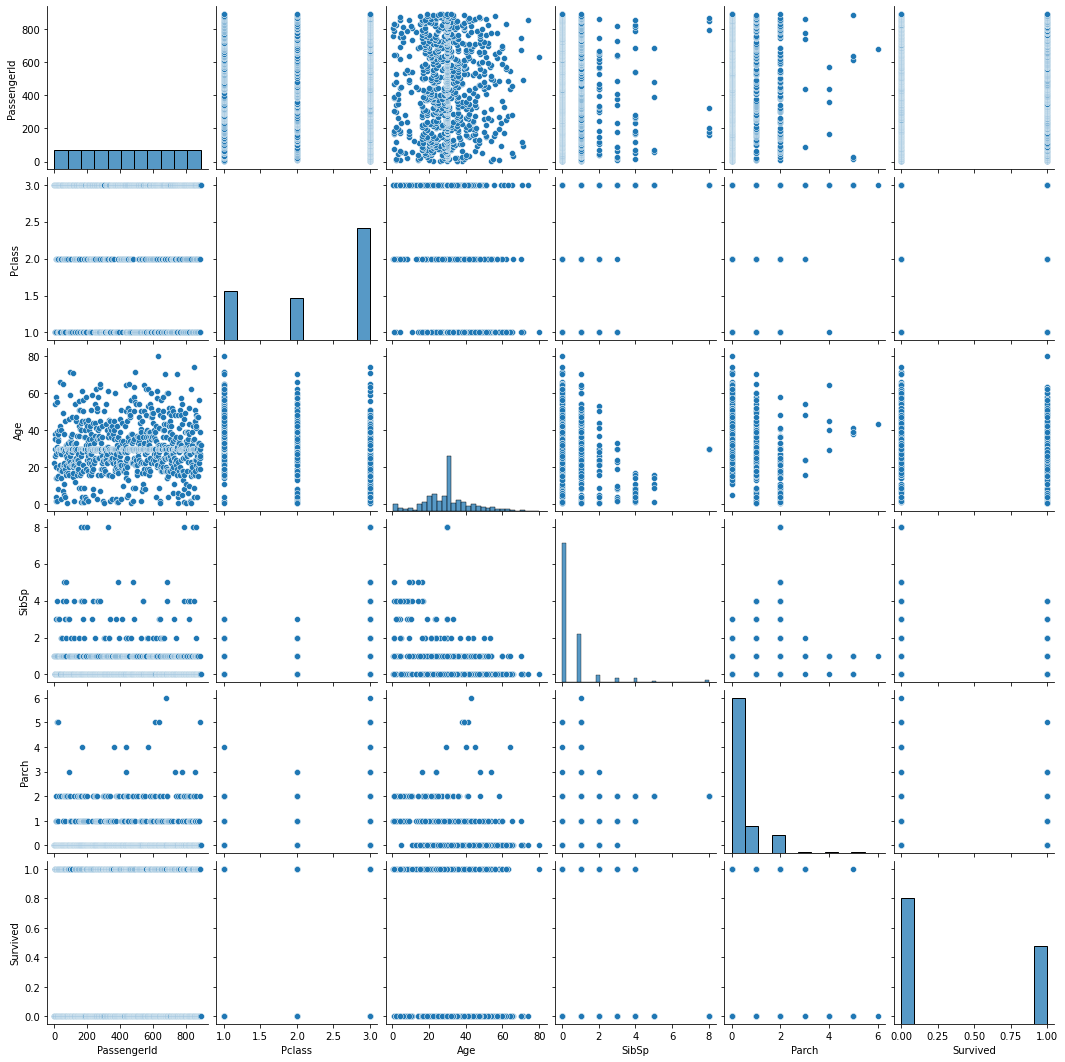

In [ ]:
sns.pairplot(data=data)
# Kemudian kita akan masuk kedalam tahap VEDA, berikut adalah hasil penyebaran data dari setiap variabel dan hubungan antara variabel a dan variabel b
# Namun karena ini divisualiasikan secara general, maka akan sedikit untuk dapat kita analisa. Saya akan mencoba membuat perbandingan untuk setiap variabel independent dengan variabel dependent

Exploration of Age 

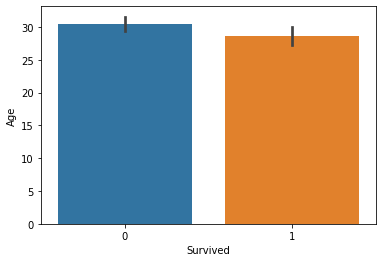

In [ ]:
sns.barplot(data=data, x= data["Survived"], y= data["Age"])
# Berdasarkan hasil dari ploting ini, bisa dilihat bahwa penumpang dengan umur diatas 30 memiliki jumlah kematian yang lebih besar dibandingkan dengan umur dibawah 30

Exploration of Pclass 

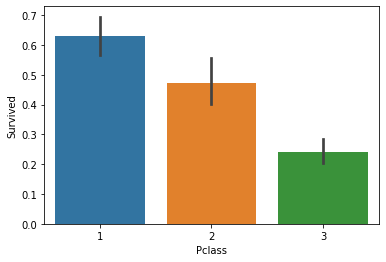

In [ ]:
sns.barplot(data=data, x= data["Pclass"], y= data["Survived"])

# Kemudian untuk Pclass, dapat dilihat dari data dibawah ini bahwa orang yang masuk ke kapal dengan kelas 1  memiliki kemungkinan survived yang lebih tinggi dibandingkan dengan kelas lainnya

Exploration of PassengerId 

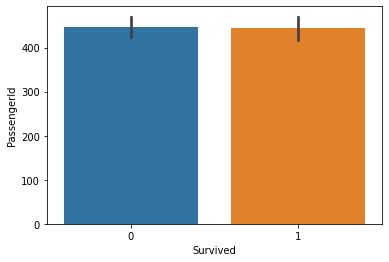

In [ ]:
sns.barplot(data=data, x= data["Survived"], y= data["PassengerId"])
# Untuk visualisasi passengerId memiliki tingkat survived yang sama dengan tidak survived, sehingga seharusnya passengerId memiliki korelasi yang cukup kecil dengan variabel Survived

Exploration of SibSp 

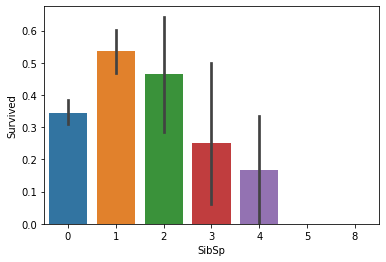

In [ ]:
sns.barplot(data=data, x= data["SibSp"], y= data["Survived"])
# Selanjutnya adalah variabel SibSp, bisa dilihat bahwa variabelSibSp dengan data 1 memiliki kemungkinan untuk survived jauh lebih tinggi dibanding dengan angka lainnya

Exploration of Parch 

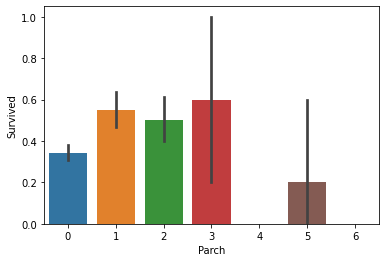

In [ ]:
sns.barplot(data=data, x= data["Parch"], y= data["Survived"])
# Selanjutnya untuk Parch, Parch dengan data 3 memiliki kemungkinan Survived yang lebih tinggi dibandingkan dengan angka lainnya 

### Data Correlation

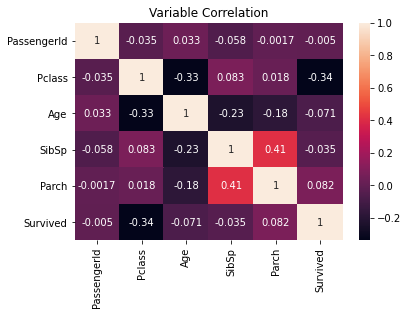

In [ ]:
metric = data.corr()
plt.title('Variable Correlation')
sns.heatmap(metric, annot=True)
plt.show()

# Selanjutnya kita kana melihat korelasi antara variabel yang satu denagn variabel lainnya menggunakan sebuah heatmap dengan library seaborn
# Dalam heatmap yang sudah kita ploting terdapat warna gelap dan warna terang, semakin terang warna heatmap tersebut, maka hubungan antar 2 variabel tersebut semakin besar korelasinya
# Sedangkan semakin gelap warna heatmap tersebut, maka hubungan antar 2 variabel tersebut semakin kecil korelasinya
# Dalam hal ini kita cukup memperhatikan baris dan kolom dari variabel survived sebagai variabel dependent yang akan dilihat korelasinya dengan variabel independent lainnya
# Bila dilihat pada heatmap, seharusnya variabel Parch memiliki korelasi yang paling besar dengan variabel survived, hal ini dikarenakan variabel PClass memiliki korelasi yang bernilai mines jika disesuaikan dengan heatmap tersebut

### Make feature and label for training and testing

In [ ]:
feature = data[['PassengerId', 'Pclass', 'Age', 'SibSp' ,'Parch']] 
label = data[['Survived']]
label

# Selanjutnya kita akan masuk kedalam preprocessing dan split dataset, dimana sebelumnya kita akan membuat variabel feature dan label
# Dimana kedua variabel tersebut akan digunakan untuk menampung variabel independent dan variabel dependent 

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
sc = StandardScaler()
feature = sc.fit_transform(feature)

# Selanjutnya masuk kedalam preprocessing, dalam hal ini kita akan menggunakan StandardScaler() untuk mempreprocessing data feature agar menghasilkan data dalam nilai yang lebih kecil
# Sehingga data dapat diolah dengan lebih mudah, dalam data ini kita tidak perlu lagi mempreprocessing data label karena output yang diberikan hanya berupa angka 0 dan 1

### Split Data (Train & Test)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=0)

# Selanjutnya masuk kedalam tahap split dataset dimana dalam split dataset ini kita akan membagi dataset untuk data training sebanayka 80% dan data test sebanyak 20%

In [ ]:
print("Berikut adalah data training hasil split dataset")
print(x_train[:10])
print("\n")
print(y_train[:10])

Berikut adalah data training hasil split dataset
[[-1.18580433  0.82737724  0.01855376 -0.4745452   2.00893337]
 [-0.0233273  -0.36936484  0.09550482 -0.4745452  -0.47367361]
 [ 1.44629249 -0.36936484  0.09550482  0.43279337  0.76762988]
 [-0.26048816  0.82737724 -0.75095691 -0.4745452  -0.47367361]
 [ 0.17884262  0.82737724 -0.67400585 -0.4745452  -0.47367361]
 [-0.44321867 -1.56610693  1.2112953  -0.4745452  -0.47367361]
 [ 0.55596728  0.82737724 -0.59705478 -0.4745452  -0.47367361]
 [-0.33824583  0.82737724  0.01855376 -0.4745452  -0.47367361]
 [ 0.89032522 -0.36936484  0.01855376 -0.4745452  -0.47367361]
 [-1.1002709   0.82737724 -0.28925051 -0.4745452  -0.47367361]]


     Survived
140         0
439         0
817         0
378         0
491         0
331         0
588         0
358         1
674         0
162         0


### Make Linear Regression Model

In [ ]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

# Selanjutnya saya akan menggunakan library from sklearn.linear_model import LinearRegression, untuk membuat linear regression model
# Selanjutnya kita akan memanggil model yang sudah dibuat dan memasukkan parameter x_train dan y_train sebagai dataset yang akan digunakan dalam model tersebut
# Saya juga membuat variabel penampung bernama y_pred yang akan menampung hasil prediksi dari model yang sudah kiita buat sebelumnya dengan menggunakan dataset x_test

In [ ]:
for i in range(len(y_pred)):
    if y_pred[i]>=0.5:
        y_pred[i] = np.round(y_pred[i])
    else:
        y_pred[i] = 0
# Dikarenakan hasil dari prediksi memiliki variasi angka sedangkan data asli dari label hanya memiliki 2 jenis angka yaitu 0 dan 1, maka untuk dapat menyesuaikan dengan data yang ada
# Saya melakukan pembulatan, jika angka yang dihasilkan y_pred diatas atau sama dengan 0.5 maka y_pred akan dibulatkan keatas, namun bila dibawah 0.5 maka akan dibulatkan kebawah menjadi nilai 0
# Hal ini dilakukan agar prediksi yang dihasilkan memiliki hasil yang lebih tepat

### Prediction Data and Actual Data

In [ ]:
print("Berikut adalah hasil dari data prediksi")
print(y_pred[:10])
print("\n")
print("Berikut adalah data aktual")
print(y_test[:10])


Berikut adalah hasil dari data prediksi
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]]


Berikut adalah data aktual
     Survived
495         0
648         0
278         0
31          1
255         1
298         1
609         1
318         1
484         1
367         1


In [ ]:
y_test = y_test.to_numpy()

# Disini saya merubah data y_test yang semula memiliki format pandas kedalam bentuk numpy, hal ini saya lakukan agar data y_test bisa dibandingkan dengan data y_pred

In [ ]:
correct = 0
for j in range(len(x_test)):
    if y_pred[j] == y_test[j]:
        correct += 1
print(f'Accuracy : {(correct/len(x_test)) * 100  :.2f}%')
print(f'Correct Result : {correct}\n')

# Selanjutnya saya akan mencoba menghitung akurasi dari hasil prediksi yang dibuat sebelumnya, dengan melakukan proses cek satu per satu terhadap data aktualnya.
# Untuk melihat berapa jumlah data yang benar dan akan dibagi dengan jumlah data x_test
# Dan didapatkan hasil akurasi senilai 73%, dimana akurasi ini merupakan akurasi yang cukup baik

Accuracy : 73.18%
Correct Result : 131



In [ ]:
print('Coefficient (m) : ' + str(regressor.coef_))
print('Intercept (b) : ' + str(regressor.intercept_))

# Berikut adalah nilai dari Coefficient dan intercept model yang sudah dibuat sebelumnya

Coefficient (m) : [[-0.00866653 -0.18628813 -0.10861275 -0.04739968  0.04392086]]
Intercept (b) : [0.38531826]


### Calculating Error with Metrics

In [ ]:
from sklearn import metrics
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error :', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Kemudian saya juga melakukan evaluasi terhadap error function dengan menggunakan library metriks
# Dan dari hasil yang didapat, bisa dilihat bahwa nilai error berada dibawah angka 1, bahkan hanya mendapatkan hasil error sebesar untuk (MSE dan MAE) 0,2 dan 0,5 untuk RMSE
# Hasil erorr ini menunjukkan bahwa model dapat menghasilkan prediksi yang cukup baik  

Mean Absolute Error : 0.2681564245810056
Mean Squared Error : 0.2681564245810056
Root Mean Squared Error : 0.5178382224025236


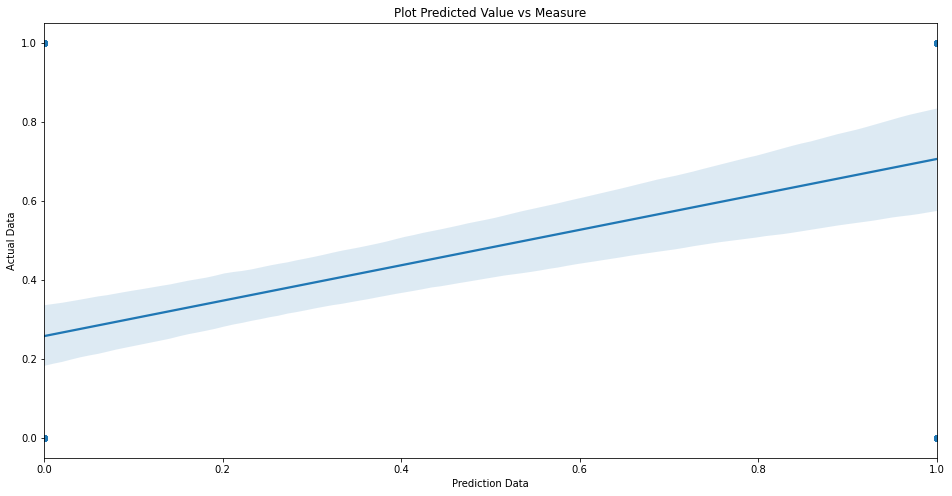

In [ ]:
plt.figure(figsize=(16,8))
sns.regplot(x = y_pred, y = y_test, data = data)
plt.title("Plot Predicted Value vs Measure")
plt.xlabel("Prediction Data")
plt.ylabel("Actual Data")
plt.show()

# Berikut adalah hasil dari ploting antara nilai prediksi dengan data aslinya,
# Dapat dilihat bahwa data yang dihasilkan hanya berupa angka 0 dan 1 saja, oleh karena itu hanya memiliki 4 titik